# Keras Clasificación binaria

# 1.Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importación fuente de datos

In [2]:
#Lectura datos históricos
df = pd.read_excel('./Heart_diagnosis.xlsx',sheet_name='heart')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 3.Análisis de Datos (EDA) + Preprocesado

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3.1 Limpieza inicial

In [6]:
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Eliminar variables que tienen un alto porcentaje de registros con el valor nulo
df_var = df.isnull().sum() #Creamos una serie de pandas con el número de valores nulos de cada variable
porcentaje_eliminacion = 0.1 #10%
df_var = df_var[df_var<porcentaje_eliminacion*len(df)] #Nos quedamos con las variables que tienen menos de un porcentaje de registros nulos
lista_variables_OK = df_var.index #Nos quedamos con el índice de la serie (los nombres de las variables de interés)
df = df[lista_variables_OK] #Filtramos el dataframe original y nos quedamos solo con las columnas de interés
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#Eliminamos registros que tienen algún valor erróneo (se podría interpolar)
df.dropna(inplace=True)
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## 3.2 Visualización

### 3.2.1 Plots básicos

<Axes: xlabel='target', ylabel='count'>

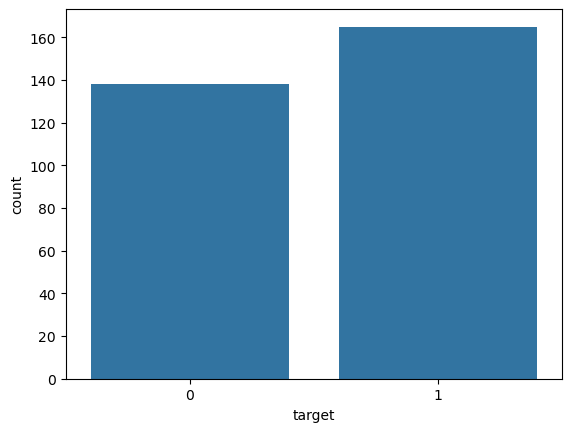

In [10]:
#Verificar si hay una proporción equilibrada entre "0" y "1" para un buen modelado posterior
sns.countplot(x='target',data=df)

<Axes: >

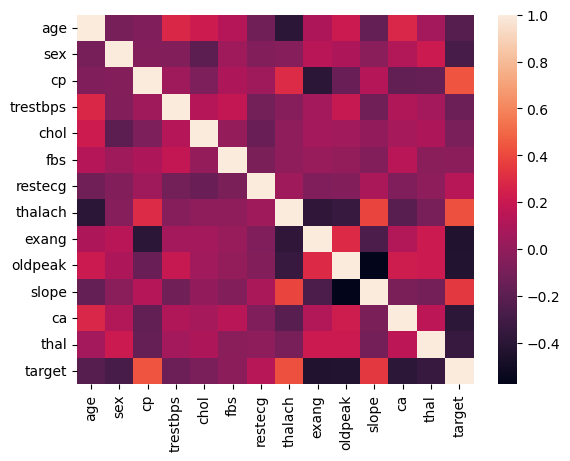

In [11]:
sns.heatmap(df.corr())
#En caso de que haya un error al aplicar el método corr() sobre un dataframe por el hecho de que haya columnas no numéricas (depende de la versión de la librería Pandas), lo más sencillo es aplicar el método con la opción numeric_only=True:
#df.corr(numeric_only = True)

In [12]:
df.corr()['target'].sort_values()
#En caso de que haya un error al aplicar el método corr() sobre un dataframe por el hecho de que haya columnas no numéricas (depende de la versión de la librería Pandas), lo más sencillo es aplicar el método con la opción numeric_only=True:
#df.corr(numeric_only = True)

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

<Axes: >

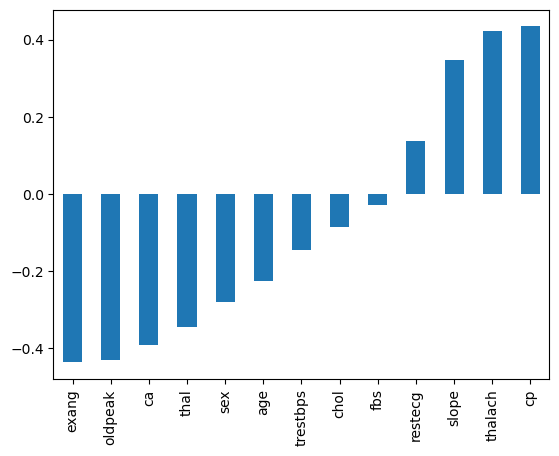

In [13]:
df.corr()['target'][:-1].sort_values().plot(kind='bar') #Quitamos la propia variable objetivo
#En caso de que haya un error al aplicar el método corr() sobre un dataframe por el hecho de que haya columnas no numéricas (depende de la versión de la librería Pandas), lo más sencillo es aplicar el método con la opción numeric_only=True:
#df.corr(numeric_only = True)

<Axes: xlabel='target', ylabel='cp'>

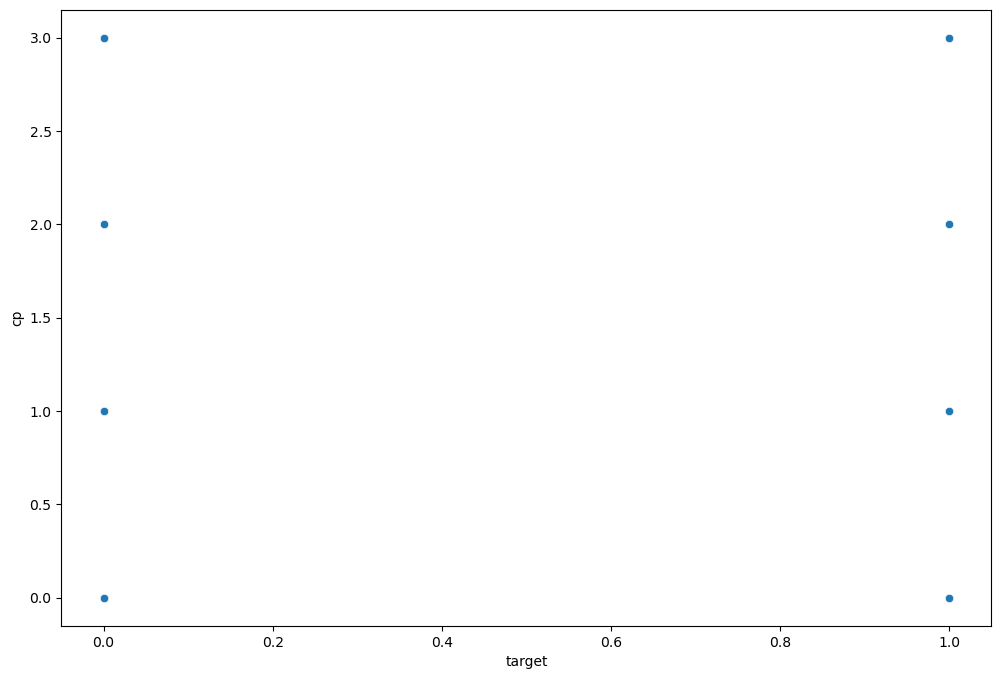

In [14]:
#Visualizar variables altamente correladas con la salida
plt.figure(figsize=(12,8))
sns.scatterplot(x='target',y='cp',data=df)

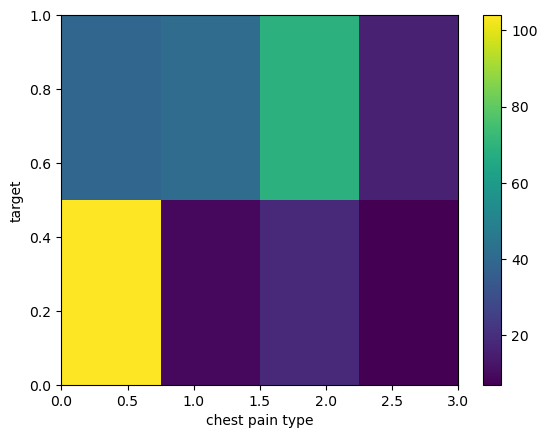

In [15]:
#Si los valores están normalizados, lo mejor es visualizar un histograma 2D
plt.hist2d(df["cp"],df["target"],bins=(4,2),cmap=plt.cm.viridis)
plt.xlabel('chest pain type')
plt.ylabel('target')
plt.colorbar()

### 3.2.2 Plot geográficos

In [16]:
# Visualizar la información geográfica si estuviera completa, el ejemplo que hay a continuación proviende de una 
# fuente de datos alternativa: https://www.kaggle.com/harlfoxem/housesalesprediction
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='price',y='long',data=df)
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='price',y='lat',data=df)
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='long',y='lat',data=df,hue='price') #Representación con poco rango dinámico de colores debido a los outliers
#len(df)*(0.01) #número de muestras que sería el 1% de nuestros datos
#non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:] #estaríamos quitando el 1% de valores outliers
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='long',y='lat',
#                data=non_top_1_perc,hue='price',
#                palette='RdYlGn',edgecolor=None,alpha=0.2) 

### 3.2.3 Otras variables

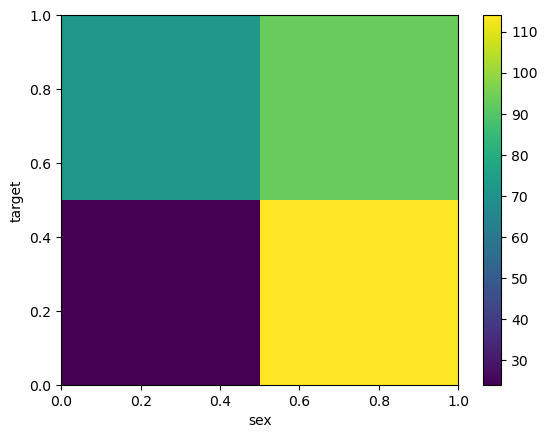

In [17]:
plt.hist2d(df["sex"],df["target"],bins=(2,2),cmap=plt.cm.viridis)
plt.xlabel('sex')
plt.ylabel('target')
plt.colorbar()

## 3.3 Limpieza final

In [18]:
# Objetivo: Eliminar variables que no tienen ninguna relación con la variable objetivo (precio) 
# o bien su información ya está incluida en otras variables - Aprovechar conocimiento del campo que estamos tratando

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
df.corr()['target'].sort_values() #Podríamos eliminar "fbs" = "fasting blood sugar > 120 mg/dl", correlación muy baja
#En caso de que haya un error al aplicar el método corr() sobre un dataframe por el hecho de que haya columnas no numéricas (depende de la versión de la librería Pandas), lo más sencillo es aplicar el método con la opción numeric_only=True:
#df.corr(numeric_only = True)

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

### 3.3.2 Limpieza temporal

In [21]:
#Importante visualizar la evolución temporal (si ha habido un importante cambio, quedarse con 
#la porción de datos que corresponde a la situación actual para mejorar la futura predicción)
#El ejemplo que hay a continuación proviende de una fuente de datos alternativa: https://www.kaggle.com/harlfoxem/housesalesprediction

#df['date'] = pd.to_datetime(df['date'])

#df['month'] = df['date'].apply(lambda date:date.month)

#df['year'] = df['date'].apply(lambda date:date.year)

#sns.boxplot(x='year',y='price',data=df)

#sns.boxplot(x='month',y='price',data=df)

#df.groupby('month').mean()['price'].plot()

#df.groupby('year').mean()['price'].plot()

#df = df.drop('date',axis=1) #La fecha no será una variable útil para el modelo

#df['sqft_basement'].value_counts()

### 3.3.3 Transformación variables categóricas

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#Utilizar OneHotEncoder si variables categóricas (se obtiene una columna por cada categoría asignando 0 o 1) / Las variables booleanas no es necesario convertirlas True = 1 / False = 0
#from sklearn.preprocessing import OneHotEncoder
#oe_style = OneHotEncoder()
#oe_results = oe_style.fit_transform(df[["body_style"]]) #body_style sería la variable categórica
#pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
#df = df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))

# 4.Train Test Split

In [24]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [25]:
X.shape

(303, 13)

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [29]:
X_train.shape

(227, 13)

In [30]:
X_test.shape

(76, 13)

In [31]:
type(X_train)

numpy.ndarray

In [32]:
type(X_test)

numpy.ndarray

# 5.Escalado

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
scaler.fit(X_train)

MinMaxScaler()

In [36]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train.shape

(227, 13)

In [38]:
X_test.shape

(76, 13)

In [39]:
X_train

array([[0.79166667, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       [0.70833333, 1.        , 0.        , ..., 1.        , 0.75      ,
        1.        ],
       [0.29166667, 1.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.35416667, 1.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.25      , 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.33333333],
       [0.39583333, 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667]])

In [40]:
X_train.max()

np.float64(1.0)

# 6.Creación del modelo

    # Para un problema de clasificación binario
    model.compile(optimizer='rmsprop', # o "adam"
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [42]:
X_train.shape

(227, 13)

In [43]:
model = Sequential()
# Elegir número de capas (layers)
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
num_neuronas = X_train.shape[1]
model.add(Dense(units=num_neuronas,activation='relu'))

model.add(Dense(units=np.round(num_neuronas/2).astype(int),activation='relu'))

model.add(Dense(units=1,activation='sigmoid')) # Indicar tantas neuronas de salida como variables a predecir, en este caso solo 1 variable "target"

# Para clasificación binaria "binary_crossentropy"
model.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
X_train

array([[0.79166667, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       [0.70833333, 1.        , 0.        , ..., 1.        , 0.75      ,
        1.        ],
       [0.29166667, 1.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.35416667, 1.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.25      , 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.33333333],
       [0.39583333, 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667]])

# 7. Entrenamiento del modelo

### Ejemplo 1: Valor alto de epochs y overfitting

In [45]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6799 - val_loss: 0.6841
Epoch 2/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6746 - val_loss: 0.6764
Epoch 3/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6689 - val_loss: 0.6686
Epoch 4/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6631 - val_loss: 0.6602
Epoch 5/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6575 - val_loss: 0.6516
Epoch 6/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6520 - val_loss: 0.6432
Epoch 7/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6455 - val_loss: 0.6359
Epoch 8/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6392 - val_loss: 0.6282
Epoch 9/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6320 - val_loss: 0.6214
Epoch 10/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6255 - val_loss: 0.6148
Epoch 11/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6186 - val_loss: 0.6065
Epoch 12/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6122 - val_loss: 0.5984


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3465 - val_loss: 0.3773
Epoch 140/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3141 - val_loss: 0.3767
Epoch 141/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3665 - val_loss: 0.3757
Epoch 142/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3399 - val_loss: 0.3743
Epoch 143/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3062 - val_loss: 0.3741
Epoch 144/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3251 - val_loss: 0.3743
Epoch 145/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3473 - val_loss: 0.3755
Epoch 146/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3503 - val_loss: 0.3720
Epoch 147/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3178 - val_loss: 0.3719
Epoch 148/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3498 - val_loss: 0.3733
Epoch 149/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3342 - val_loss: 0.3701
Epoch 150/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3152 - val_loss: 0

Epoch 208/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3456 - val_loss: 0.3722
Epoch 209/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3300 - val_loss: 0.3694
Epoch 210/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3365 - val_loss: 0.3698
Epoch 211/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3159 - val_loss: 0.3703
Epoch 212/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2793 - val_loss: 0.3715
Epoch 213/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3484 - val_loss: 0.3729
Epoch 214/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3790 - val_loss: 0.3726
Epoch 215/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3338 - val_loss: 0.3726
Epoch 216/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3323 - val_loss: 0.3733
Epoch 217/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3192 - val_loss: 0.3752
Epoch 218/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3071 - val_loss: 0.3741
Epoch 219/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3513

Epoch 277/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3495 - val_loss: 0.3618
Epoch 278/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3307 - val_loss: 0.3647
Epoch 279/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2807 - val_loss: 0.3662
Epoch 280/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2904 - val_loss: 0.3647
Epoch 281/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3216 - val_loss: 0.3633
Epoch 282/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3294 - val_loss: 0.3656
Epoch 283/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3300 - val_loss: 0.3646
Epoch 284/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3232 - val_loss: 0.3617
Epoch 285/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3063 - val_loss: 0.3623
Epoch 286/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2871 - val_loss: 0.3640
Epoch 287/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2970 - val_loss: 0.3656
Epoch 288/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3112

Epoch 346/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3078 - val_loss: 0.3675
Epoch 347/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3140 - val_loss: 0.3678
Epoch 348/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3221 - val_loss: 0.3672
Epoch 349/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2980 - val_loss: 0.3672
Epoch 350/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3130 - val_loss: 0.3693
Epoch 351/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2961 - val_loss: 0.3706
Epoch 352/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2817 - val_loss: 0.3670
Epoch 353/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2835 - val_loss: 0.3667
Epoch 354/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3260 - val_loss: 0.3671
Epoch 355/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3254 - val_loss: 0.3652
Epoch 356/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3008 - val_loss: 0.3667
Epoch 357/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3078

Epoch 415/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2704 - val_loss: 0.3697
Epoch 416/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2540 - val_loss: 0.3685
Epoch 417/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2949 - val_loss: 0.3657
Epoch 418/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2772 - val_loss: 0.3674
Epoch 419/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2702 - val_loss: 0.3704
Epoch 420/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2721 - val_loss: 0.3763
Epoch 421/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3178 - val_loss: 0.3771
Epoch 422/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2880 - val_loss: 0.3758
Epoch 423/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3233 - val_loss: 0.3797
Epoch 424/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2745 - val_loss: 0.3788
Epoch 425/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2789 - val_loss: 0.3792
Epoch 426/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2835

Epoch 484/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2415 - val_loss: 0.3734
Epoch 485/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2588 - val_loss: 0.3708
Epoch 486/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2878 - val_loss: 0.3700
Epoch 487/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3108 - val_loss: 0.3731
Epoch 488/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2671 - val_loss: 0.3737
Epoch 489/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2965 - val_loss: 0.3730
Epoch 490/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2674 - val_loss: 0.3710
Epoch 491/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2808 - val_loss: 0.3731
Epoch 492/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2610 - val_loss: 0.3765
Epoch 493/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2750 - val_loss: 0.3781
Epoch 494/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2794 - val_loss: 0.3773
Epoch 495/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3053

Epoch 553/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2524 - val_loss: 0.3787
Epoch 554/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2551 - val_loss: 0.3798
Epoch 555/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2754 - val_loss: 0.3864
Epoch 556/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2550 - val_loss: 0.3850
Epoch 557/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2162 - val_loss: 0.3836
Epoch 558/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3027 - val_loss: 0.3818
Epoch 559/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2677 - val_loss: 0.3771
Epoch 560/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2720 - val_loss: 0.3755
Epoch 561/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2379 - val_loss: 0.3751
Epoch 562/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2147 - val_loss: 0.3750
Epoch 563/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2366 - val_loss: 0.3764
Epoch 564/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2345

In [46]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

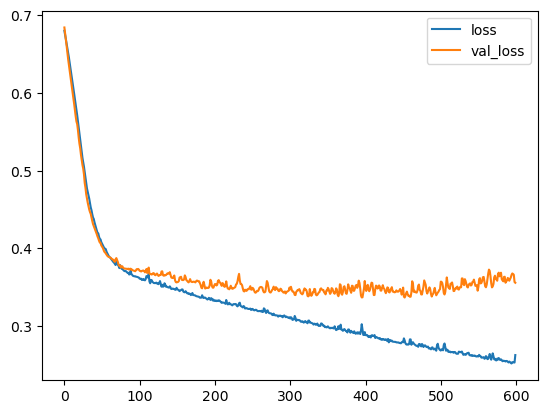

In [47]:
model_loss.plot()

### Ejemplo 2: Early Stopping

Aplicar early stopping para seguir a val_loss y parar en base a la condición indicada

In [52]:
model = Sequential()
model.add(Dense(units=num_neuronas,activation='relu'))
model.add(Dense(units=np.round(num_neuronas/2).astype(int),activation='relu')) #De esta manera fuerzas a que el resultado sea el número entero en lugar de un valor float que en la versión 2.16.1 de Tensorflow no lo admite.
model.add(Dense(units=1,activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

Parar el entrenamiento cuando un valor monitorizado (pérdidas) deja de mejorar:

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [53]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [54]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6973 - val_loss: 0.6713
Epoch 2/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6874 - val_loss: 0.6606
Epoch 3/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6782 - val_loss: 0.6501
Epoch 4/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6696 - val_loss: 0.6405
Epoch 5/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6624 - val_loss: 0.6308
Epoch 6/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6563 - val_loss: 0.6225
Epoch 7/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6495 - val_loss: 0.6137
Epoch 8/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6423 - val_loss: 0.6044
Epoch 9/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6353 - val_loss: 0.5946
Epoch 10/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6278 - val_loss: 0.5844
Epoch 11/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6206 - val_loss: 0.5746
Epoch 12/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6114 - val_loss: 0.5652


<Axes: >

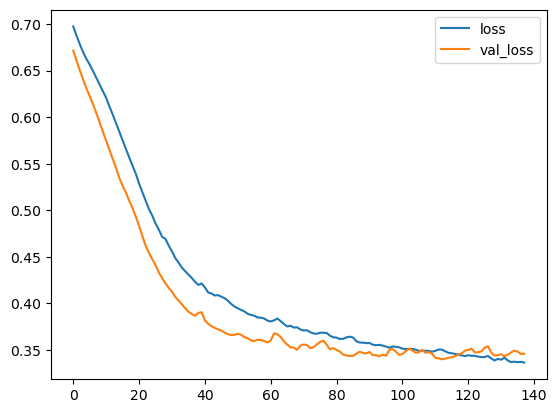

In [55]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Ejemplo 3: Añadir DropOut Layers
    #Solo algunas neuronas se actualizarán en cada epoch, permitiendo que solo se ajusten algunos pesos (w) y bias (b) en cada iteración de manera independiente (reduce overfitting)

In [56]:
from tensorflow.keras.layers import Dropout

In [59]:
model = Sequential()

model.add(Dense(units=num_neuronas,activation='relu'))
model.add(Dropout(0.5)) #la mitad de las neuronas en cada epoch para esta capa

model.add(Dense(units=np.round(num_neuronas/2).astype(int),activation='relu'))
model.add(Dropout(0.5)) #la mitad de las neuronas en cada epoch para esta capa

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [60]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.8246 - val_loss: 0.7842
Epoch 2/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7590 - val_loss: 0.7661
Epoch 3/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7950 - val_loss: 0.7514
Epoch 4/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7841 - val_loss: 0.7387
Epoch 5/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7754 - val_loss: 0.7288
Epoch 6/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7804 - val_loss: 0.7206
Epoch 7/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7263 - val_loss: 0.7134
Epoch 8/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6851 - val_loss: 0.7095
Epoch 9/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7011 - val_loss: 0.7055
Epoch 10/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7103 - val_loss: 0.7018
Epoch 11/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6939 - val_loss: 0.6994
Epoch 12/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7244 - val_loss: 0.6973


Epoch 250/600
8/8 [==============================] - 0s 6ms/step - loss: 0.4558 - val_loss: 0.3839
Epoch 251/600
8/8 [==============================] - 0s 8ms/step - loss: 0.4803 - val_loss: 0.3837
Epoch 252/600
8/8 [==============================] - 0s 6ms/step - loss: 0.4846 - val_loss: 0.3827
Epoch 253/600
8/8 [==============================] - 0s 7ms/step - loss: 0.4432 - val_loss: 0.3825
Epoch 254/600
8/8 [==============================] - 0s 6ms/step - loss: 0.4898 - val_loss: 0.3810
Epoch 255/600
8/8 [==============================] - 0s 6ms/step - loss: 0.4826 - val_loss: 0.3796
Epoch 256/600
8/8 [==============================] - 0s 6ms/step - loss: 0.4451 - val_loss: 0.3790
Epoch 257/600
8/8 [==============================] - 0s 7ms/step - loss: 0.4549 - val_loss: 0.3790
Epoch 258/600
8/8 [==============================] - 0s 7ms/step - loss: 0.4515 - val_loss: 0.3810
Epoch 259/600
8/8 [==============================] - 0s 6ms/step - loss: 0.4495 - val_loss: 0.3823
Epoch 260/

<Axes: >

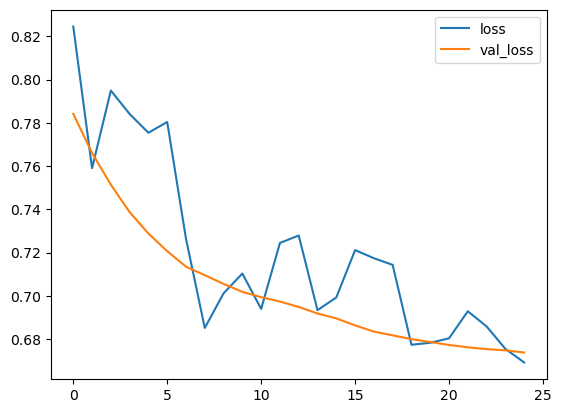

In [61]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# 8. Evaluación del modelo

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

## 8.1 Predicción sobre el conjunto de Test

In [64]:
#predictions = model.predict_classes(X_test) #Versión anterior de scikit-learn
predictions = (model.predict(X_test) > 0.5).astype("int32") #Si nueva versión de scikit-learn

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [65]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68        37
           1       0.69      0.85      0.76        39

    accuracy                           0.72        76
   macro avg       0.74      0.72      0.72        76
weighted avg       0.74      0.72      0.72        76



In [66]:
print(confusion_matrix(y_test,predictions))

[[22 15]
 [ 6 33]]


## 8.2 Predicción sobre nuevos datos

In [68]:
#Lectura datos a predecir
df_pred = pd.read_excel('./Heart_diagnosis.xlsx',sheet_name='Datos_Predecir')
df_pred = df_pred[df.columns] #Filtramos el dataframe predicción para quedarnos con las mismas columnas de interés que el df histórico
X_pred = df_pred.drop('target',axis=1) #Eliminamos la columna objetivo (vacía) si la hubiera en nuestro df con los datos a predecir
X_pred = scaler.transform(X_pred)
#Realizamos predicción
#resultado = model.predict_classes(X_pred)
resultado = (model.predict(X_test) > 0.5).astype("int32") #Si nueva versión de scikit-learn
#Unimos en un dataframe los datos a predecir con su predicción
df_pred['PREDICCIÓN']=pd.DataFrame(resultado)
df_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


C:\Users\Iván Pinar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,PREDICCIÓN
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,NaN,0
1,42,1,2,130,250,0,1,187,0,3.5,0,0,2,NaN,1
2,40,0,1,130,204,0,0,172,0,1.4,2,0,2,NaN,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,NaN,1
4,62,0,0,120,354,0,1,163,1,0.6,2,0,2,NaN,0
5,58,1,0,140,192,0,1,148,0,0.4,1,0,1,NaN,1
6,55,0,1,140,294,0,0,153,0,1.3,1,0,2,NaN,1
7,34,1,1,120,263,0,1,173,0,0.0,2,0,3,NaN,0
8,50,1,2,172,199,1,1,162,0,0.5,2,0,3,NaN,0
9,59,1,2,150,168,0,1,174,0,1.6,2,0,2,NaN,0


In [78]:
#Guardar y cargar el modelo para posterior uso
from tensorflow.keras.models import load_model
model.save('modelo_pred_heart.keras')